In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from PIL import Image 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import sklearn as sk
from sklearn.model_selection import train_test_split
import pickle
import cv2

print(tf.__version__)

2024-11-17 15:08:39.575134: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-17 15:08:39.581840: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-17 15:08:39.589713: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-17 15:08:39.591962: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-17 15:08:39.598155: I tensorflow/core/platform/cpu_feature_guar

2.17.0


In [22]:
negative_path = 'Sheet 1/'
intensity_list = os.listdir(negative_path+"Intensity")
height_list = os.listdir(negative_path+"Height")

# initialize storage of data and labels
data0 = []
labels0 = []
for i in range(len(intensity_list)):
#for f in os.listdir(negative_path+"Intensity"):
    # get the intensity
    intensity_image = np.float32( Image.open(negative_path + "Intensity/" + intensity_list[i]))
    down_samp = cv2.resize(intensity_image, (512,512), interpolation=cv2.INTER_LINEAR)
    reshaped_intensity = np.mean(down_samp, axis=-1) 
    image_array = np.expand_dims(reshaped_intensity, axis=-1)
    rescaled_array = image_array/255.0
    #print(rescaled_array.shape)   

    # get heights
    raw_heights = pd.read_csv(negative_path+"Height/"+height_list[i],skiprows=18)
    raw_heights = raw_heights.drop(['DataLine','Unnamed: 1025'],axis=1)
    np_heights = np.array(raw_heights)
    down_heights = cv2.resize(np_heights, (512,512), interpolation=cv2.INTER_LINEAR)
    max_height = np.max(down_heights)
    exp_height = np.expand_dims(down_heights,axis=-1)
    rescaled_height = exp_height/max_height
    #print(rescaled_height.shape)

    # combine height and intensity
    combined_data = np.concatenate([rescaled_array,rescaled_height],axis=-1)


    data0.append(combined_data)
    #print(file)
    #image_tensor = tf.convert_to_tensor(image_array, dtype=tf.float32)
    #rescaled_tensor = image_tensor/255.0
    #images2.append(rescaled_tensor)
    labels0.append(0.0)
print('success')

success


In [19]:
exp_heights.shape

(512, 512, 1)

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
gpuid = 0 #int(args.gpu_id)                                                                                                                           
if gpus:
  # Restrict TensorFlow to only allocate X GB of memory on the first GPU                                                                              
  try:
    tf.config.set_visible_devices(gpus[gpuid], 'GPU')
    tf.config.set_logical_device_configuration(
        gpus[gpuid],
        [tf.config.LogicalDeviceConfiguration(memory_limit=8000)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized                                                                                   
    print(e)

In [5]:
negative_path = 'Sheet 1/Height/'
ex1 = os.listdir(negative_path)[0]

In [8]:
negative_path+ex1

'Sheet 1/Height/Sheet_1_231_X001_Y001_G232_A001_HeightCSV.csv'

In [38]:
ex1_df = pd.read_csv(negative_path+ex1,skiprows=18)
ex1_df
ex1_df = ex1_df.drop(['DataLine','Unnamed: 1025'],axis=1)
#ex1_df
array = np.array(ex1_df)
array.shape

(1024, 1024)

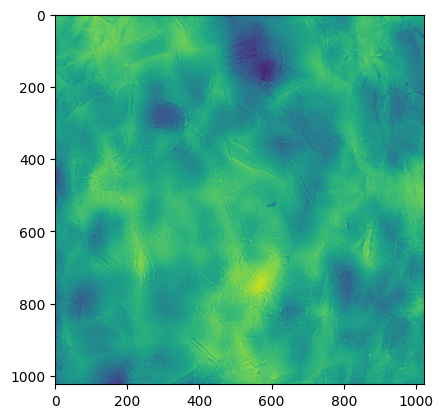

In [55]:
plt.imshow(array)

In [40]:
down_height = cv2.resize(array, (512,512), interpolation=cv2.INTER_LINEAR)
down_height.shape

(512, 512)

In [56]:
max_height = np.max(down_height)

In [59]:
(down_height/max_height)

array([[0.65385175, 0.6585279 , 0.67108393, ..., 0.63729916, 0.64624695,
        0.6634144 ],
       [0.66166691, 0.65849554, 0.66752423, ..., 0.64640875, 0.64741194,
        0.64440238],
       [0.70396259, 0.69482064, 0.69257156, ..., 0.64896526, 0.63597236,
        0.62385321],
       ...,
       [0.42276265, 0.42912156, 0.43277834, ..., 0.5774477 , 0.56987525,
        0.57178454],
       [0.41865282, 0.42881414, 0.43651603, ..., 0.57898484, 0.57625034,
        0.57021504],
       [0.41687297, 0.42844199, 0.436872  , ..., 0.57023122, 0.58531139,
        0.58031164]])

In [20]:
intensity_image = np.float32( Image.open('Sheet 1/Intensity/'+'Sheet_1_000_X001_Y001_G001_A001_I.tiff'))
intensity_image.shape

(1024, 1024, 3)

In [23]:
down_samp = cv2.resize(intensity_image, (512,512), interpolation=cv2.INTER_LINEAR)
reshaped_intensity = np.mean(down_samp, axis=-1) 
image_array = np.expand_dims(reshaped_intensity, axis=-1)

In [26]:
down_samp

array([[[159.75, 159.75, 159.75],
        [183.25, 183.25, 183.25],
        [190.75, 190.75, 190.75],
        ...,
        [ 90.25,  90.25,  90.25],
        [ 82.75,  82.75,  82.75],
        [ 96.5 ,  96.5 ,  96.5 ]],

       [[ 88.  ,  88.  ,  88.  ],
        [ 62.5 ,  62.5 ,  62.5 ],
        [ 91.25,  91.25,  91.25],
        ...,
        [ 79.75,  79.75,  79.75],
        [ 89.  ,  89.  ,  89.  ],
        [ 76.75,  76.75,  76.75]],

       [[141.  , 141.  , 141.  ],
        [141.25, 141.25, 141.25],
        [154.5 , 154.5 , 154.5 ],
        ...,
        [ 88.  ,  88.  ,  88.  ],
        [ 72.25,  72.25,  72.25],
        [ 63.75,  63.75,  63.75]],

       ...,

       [[131.  , 131.  , 131.  ],
        [134.25, 134.25, 134.25],
        [136.25, 136.25, 136.25],
        ...,
        [125.5 , 125.5 , 125.5 ],
        [124.  , 124.  , 124.  ],
        [116.  , 116.  , 116.  ]],

       [[103.  , 103.  , 103.  ],
        [111.5 , 111.5 , 111.5 ],
        [120.  , 120.  , 120.  ],
        .

In [44]:
reshaped_intensity.shape
down_samp.shape
image_array.shape

(512, 512, 1)

In [48]:
exp_dims = np.expand_dims(down_height, axis=-1)
exp_dims.shape

(512, 512, 1)

In [49]:
combined_data = np.concatenate([image_array, exp_dims], axis=-1)

In [50]:
combined_data.shape

(512, 512, 2)

In [53]:
combined_data

array([[[159.75      ,   4.18650594],
        [183.25      ,   4.21644655],
        [190.75      ,   4.29684073],
        ...,
        [ 90.25      ,   4.08052238],
        [ 82.75      ,   4.13781359],
        [ 96.5       ,   4.24773398]],

       [[ 88.        ,   4.2365451 ],
        [ 62.5       ,   4.21623935],
        [ 91.25      ,   4.27404857],
        ...,
        [ 79.75      ,   4.1388496 ],
        [ 89.        ,   4.14527285],
        [ 76.75      ,   4.12600311]],

       [[141.        ,   4.50735743],
        [141.25      ,   4.44882302],
        [154.5       ,   4.43442251],
        ...,
        [ 88.        ,   4.15521852],
        [ 72.25      ,   4.07202712],
        [ 63.75      ,   3.99443017]],

       ...,

       [[131.        ,   2.70688016],
        [134.25      ,   2.74759525],
        [136.25      ,   2.77100902],
        ...,
        [125.5       ,   3.69730324],
        [124.        ,   3.64881809],
        [116.        ,   3.66104298]],

       [[103.  

Making sure I combined height and intensity correctly

In [ ]:
negative_path = 'Sheet 1/'
intensity_list = os.listdir(negative_path+"Intensity")
height_list = os.listdir(negative_path+"Height")

# initialize storage of data and labels
raw_height = []
scaled_height = []
for i in range(len(intensity_list)):
#for f in os.listdir(negative_path+"Intensity"):
    # get the intensity
    intensity_image = np.float32( Image.open(negative_path + "Intensity/" + intensity_list[i]))
    down_samp = cv2.resize(intensity_image, (512,512), interpolation=cv2.INTER_LINEAR)
    reshaped_intensity = np.mean(down_samp, axis=-1) 
    image_array = np.expand_dims(reshaped_intensity, axis=-1)
    rescaled_array = image_array/255.0
    #print(rescaled_array.shape)   

    # get heights
    raw_heights = pd.read_csv(negative_path+"Height/"+height_list[i],skiprows=18)
    raw_heights = raw_heights.drop(['DataLine','Unnamed: 1025'],axis=1)
    np_heights = np.array(raw_heights)
    down_heights = cv2.resize(np_heights, (512,512), interpolation=cv2.INTER_LINEAR)
    max_height = np.max(down_heights)
    exp_height = np.expand_dims(down_heights,axis=-1)
    #raw_height.append(exp_height)
    rescaled_height = exp_height/max_height
   # scaled_height.append(rescaled_height)

    #print(rescaled_height.shape)

    # combine height and intensity
    combined_data = np.concatenate([rescaled_array,rescaled_height],axis=-1)
    data0.append(combined_data)

print('success')

In [ ]:
channel_1 = combined_data[:, :, 0] 
channel_2 = combined_data[:, :, 1]  

if False in np.isclose(channel_2,rescaled_height.squeeze()):
    print("false")

In [ ]:
sum(channel_2==rescaled_height.squeeze())
rescaled_height.squeeze()

In [ ]:
rescaled_array.squeeze()

In [ ]:
np.array(raw_height)

In [ ]:
raw_height = np.array(raw_height)
scaled_height = np.array(scaled_height)
plt.imshow(np.array(raw_height)[0],cmap='grey')
plt.colorbar()

In [ ]:
len(scaled_height[0])

In [ ]:
plt.imshow(scaled_height[0],cmap='grey')
plt.colorbar()